In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


In [3]:
GPU_timings = pd.read_csv('data_final/strong_scaling_gpu.csv', header=0, sep=',', names=['Nodes','richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(5;2)','chebyshev(31)','CG','gauss-seidel(5;2)','richardson(8)'], 
                        usecols=['Nodes','richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(5;2)','chebyshev(31)','CG','gauss-seidel(5;2)','richardson(8)'], dtype=np.float64)

GPU_weak_timings = pd.read_csv('data_final/weak_scaling_gpu.csv', header=0, sep=',', names=['Nodes','gauss-seidel(5;2)','gauss-seidel-no-comm(5;2)','CG','richardson-no-comm(8)','chebyshev(31)','richardson(8)','newton(5)'], 
                        usecols=['Nodes','gauss-seidel(5;2)','gauss-seidel-no-comm(5;2)','CG','richardson-no-comm(8)','chebyshev(31)','richardson(8)','newton(5)'], dtype=np.float64)

#GPU_iterations = pd.read_csv('data/timings/GPU_Strong_scaling_iterations.csv', header=0, sep=',', names=['Nodes','CG','Jacobi','Chebyshev','Newton'], 
#                        usecols=['Nodes','CG','Jacobi','Chebyshev','Newton'], dtype=np.float64)
CPU_timings = pd.read_csv('data_final/strong_scaling_cpu.csv', header=0, sep=',', names=['Nodes','richardson-no-comm(8)','newton(5)','gauss-seidel(4;2)','chebyshev(31)','richardson(8)','gauss-seidel-no-comm(4;2)','CG'], 
                       usecols=['Nodes','richardson-no-comm(8)','newton(5)','gauss-seidel(4;2)','chebyshev(31)','richardson(8)','gauss-seidel-no-comm(4;2)','CG'], dtype=np.float64)
#CPU_iterations = pd.read_csv('data_midterm/strong_scaling_iterations.csv', header=0, sep=',', names=['Nodes','CG','Jacobi','Chebyshev','Newton'], 
#                       usecols=['Nodes','CG','Jacobi','Chebyshev','Newton'], dtype=np.float64)

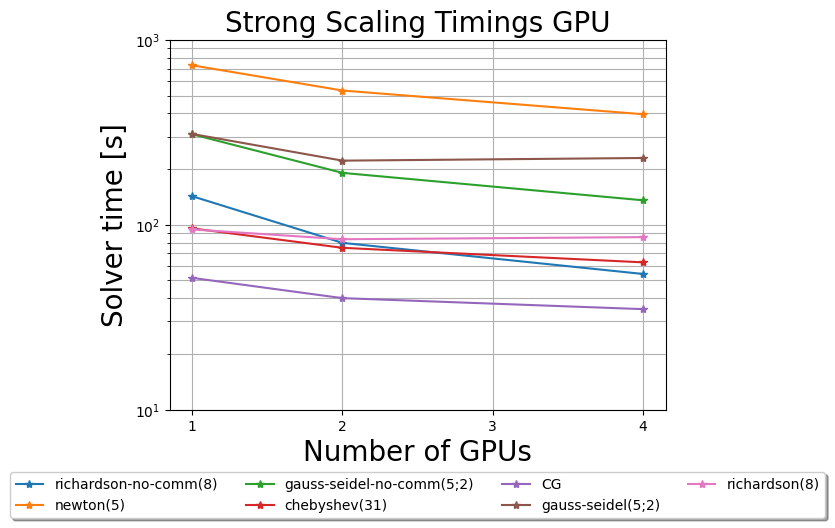

In [7]:

for preconditioner in ['richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(5;2)','chebyshev(31)','CG','gauss-seidel(5;2)','richardson(8)']:
    plt.plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner)), marker="*",  label=preconditioner)


plt.title("Strong Scaling Timings GPU", fontsize=20)
plt.yscale('log')
plt.ylabel("Solver time [s]", fontsize=20)
#plt.xlim(1,9)
plt.ylim(10, 1000)
plt.xlabel('Number of GPUs', fontsize=20)
plt.xticks(np.arange(1,5,step=1))
plt.grid('True', which='both')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.savefig('strong_scaling_timings_gpu.pdf',bbox_inches="tight")

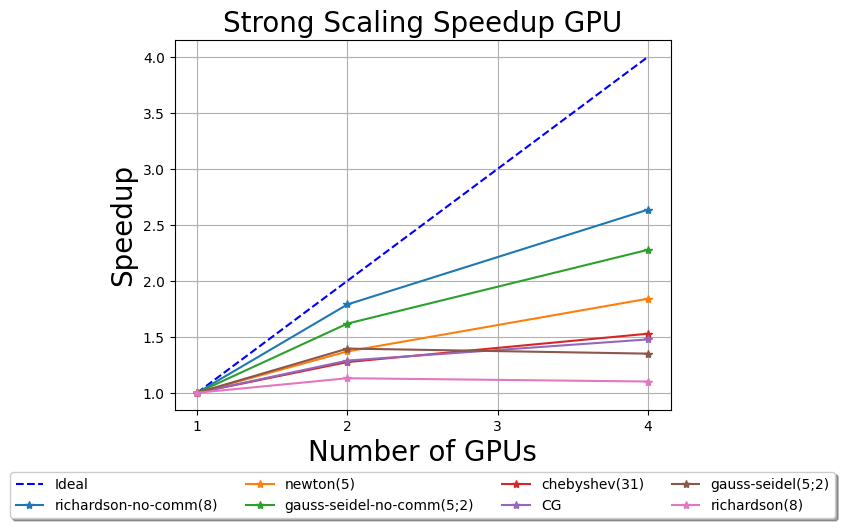

In [16]:
plt.plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get('Nodes')), 'b--',  label="Ideal")
for preconditioner in ['richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(5;2)','chebyshev(31)','CG','gauss-seidel(5;2)','richardson(8)']:
    plt.plot(np.array(GPU_timings.get('Nodes')), np.array(GPU_timings.get(preconditioner))[0]/np.array(GPU_timings.get(preconditioner)), marker="*",  label=preconditioner)


plt.title("Strong Scaling Speedup GPU", fontsize=20)
#plt.yscale('log')
plt.ylabel("Speedup", fontsize=20)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
plt.xticks(np.arange(1,5,step=1))
plt.xlabel('Number of GPUs', fontsize=20)
plt.grid('True', which='both')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15),
          fancybox=True, shadow=True, ncol=4)

plt.savefig('strong_scaling_speedup_gpu.pdf',bbox_inches="tight")   

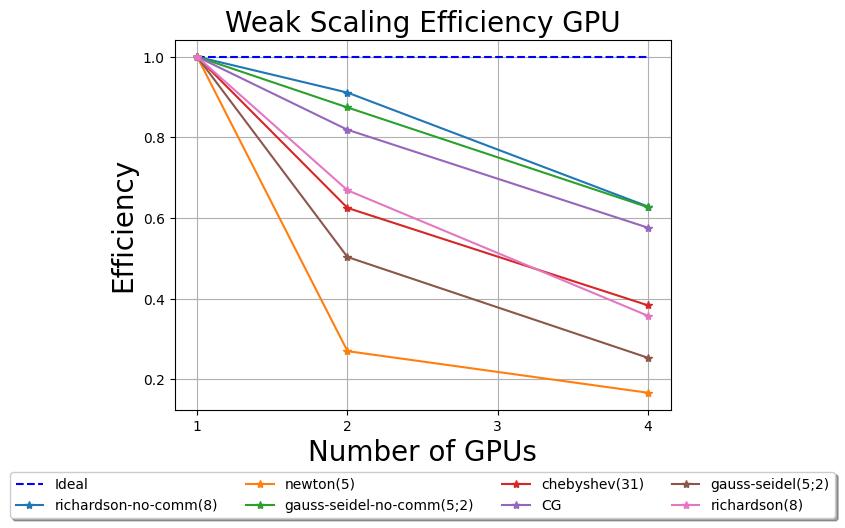

In [8]:
plt.plot(np.array(GPU_weak_timings.get('Nodes')), np.array(GPU_weak_timings.get('Nodes'))/np.array(GPU_weak_timings.get('Nodes')), 'b--',  label="Ideal")
for preconditioner in ['richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(5;2)','chebyshev(31)','CG','gauss-seidel(5;2)','richardson(8)']:
    plt.plot(np.array(GPU_weak_timings.get('Nodes')), np.array(GPU_weak_timings.get(preconditioner))[0]/np.array(GPU_weak_timings.get(preconditioner)), marker="*",  label=preconditioner)


plt.title("Weak Scaling Efficiency GPU", fontsize=20)
#plt.yscale('log')
plt.ylabel("Efficiency", fontsize=20)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
plt.xlabel('Number of GPUs', fontsize=20)
plt.xticks(np.arange(1,5,step=1))
plt.grid('True', which='both')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.savefig('weak_scaling_gpu.pdf',bbox_inches="tight")  

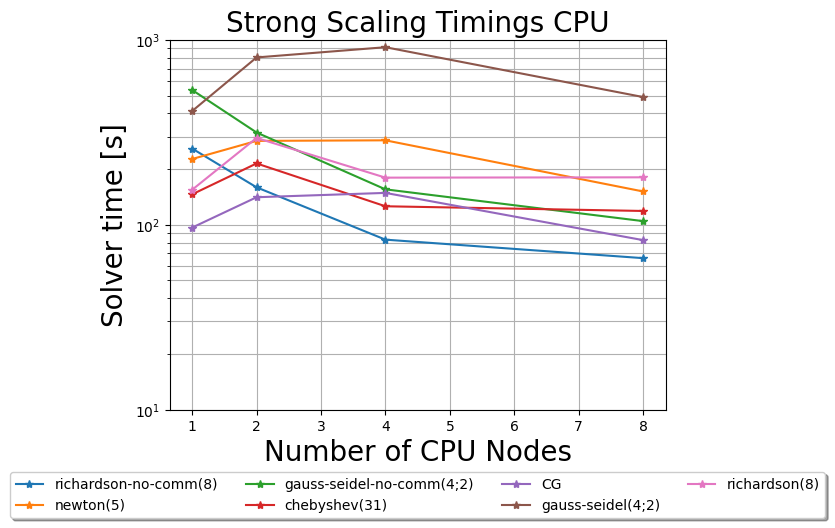

In [11]:
for preconditioner in ['richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(4;2)','chebyshev(31)','CG','gauss-seidel(4;2)','richardson(8)']:
    plt.plot(np.array(CPU_timings.get('Nodes')), np.array(CPU_timings.get(preconditioner)), marker="*",  label=preconditioner)


plt.title("Strong Scaling Timings CPU", fontsize=20)
plt.yscale('log')
plt.ylabel("Solver time [s]", fontsize=20)
#plt.xlim(1,9)
plt.ylim(10, 1000)
plt.xlabel('Number of CPU Nodes', fontsize=20)
plt.xticks(np.arange(1,9,step=1))
plt.grid('True', which='both')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.savefig('strong_scaling_timings_cpu.pdf',bbox_inches="tight")

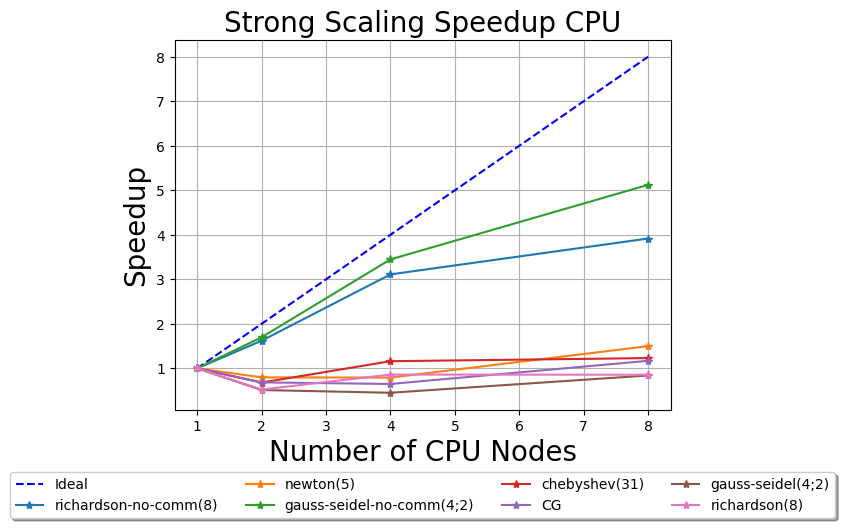

In [15]:
plt.plot(np.array(CPU_timings.get('Nodes')), np.array(CPU_timings.get('Nodes')), 'b--',  label="Ideal")
for preconditioner in ['richardson-no-comm(8)','newton(5)','gauss-seidel-no-comm(4;2)','chebyshev(31)','CG','gauss-seidel(4;2)','richardson(8)']:
    plt.plot(np.array(CPU_timings.get('Nodes')), np.array(CPU_timings.get(preconditioner))[0]/np.array(CPU_timings.get(preconditioner)), marker="*",  label=preconditioner)


plt.title("Strong Scaling Speedup CPU", fontsize=20)
#plt.yscale('log')
plt.ylabel("Speedup", fontsize=20)
#plt.xlim(1,9)
#plt.ylim(10, 1000)
plt.xlabel('Number of CPU Nodes', fontsize=20)
plt.xticks(np.arange(1,9,step=1))
plt.grid('True', which='both')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4)

plt.savefig('strong_scaling_speedup_cpu.pdf',bbox_inches="tight")